# Frequency-wavenumber spectrum

We set the symmetry argument to `sym=False` to compute only half of the spectrum because the input is real. Doing so, the computation will be faster and the mermory use will also be reduced.

In [38]:
uhat = xfft.fft(u, dim=('time_counter', 'x', 'y'), dx={'time_counter': 1, 'x': 1600, 'y': 1600}, sym=False)
vhat = xfft.fft(v, dim=('time_counter', 'x', 'y'), dx={'time_counter': 1,'x': 1600, 'y': 1600}, sym=False)

During the computation of the Fourier transform, the normalization factors for the Power Spectrum and the Power Spectrum Density (PSD) are computed. Normalizing the spectrum is then achieved by using `xscale.spectral.fft.psd` and `xscale.spectral.fft.ps`. Using the PSD normalization, we derive the Kinetic Energy (KE) spectrum:

In [39]:
KE = 1. / 2 * (xfft.psd(uhat) + xfft.psd(vhat))

The spectrum $KE(\omega, k, l) $ has now three spectral dimensions and is difficult to interpret directly. Then, we sum the KE spectrum over the dimension `f_y` corresponding to the meridional wavenumber $l$ to obtain the frequency-zonal wavenumber KE spectrum $KE(\omega, k)$. We also sum the KE spectrum over the dimension `f_time_counter` corresponding to the frequency $\omega$ to obtain the zonal-meridional wavenumber KE spectrum $KE(k, l)$.

In [40]:
KE_k_omega = KE.sum('f_y').compute()
KE_k_l = KE.sum('f_time_counter').compute()

(-0.05, 0.05)

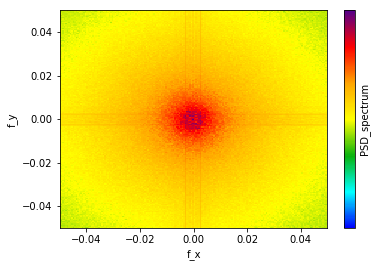

In [148]:
KE_k_l.plot(norm=colors.LogNorm(vmin=5e9, vmax=1e10), cmap=cmclimate.cm.BlAqGrYeOrReVi200)
plt.xlim((-0.05, 0.05))
plt.ylim((-0.05, 0.05))

(-0.05, 0.05)

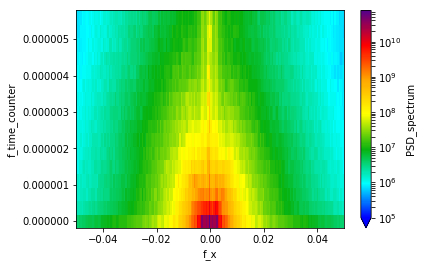

In [147]:
KE_k_omega.plot(norm=colors.LogNorm(vmin=1e5, vmax=1e10), vmin=1e5, cmap=cmclimate.cm.BlAqGrYeOrReVi200)
plt.xlim((-0.05, 0.05))